## Customer Churn Prediction

#### Problem Statement
Customer attrition or churn, is when customers stop doing business with a company. It can have a significant impact on a company's revenue and it's crucial for businesses to find out the reasons why customers are leaving and take steps to reduce the number of customers leaving. One way to do this is by identifying customer segments that are at risk of leaving, and implementing retention strategies to keep them. Also, by using data and machine learning techniques, companies can predict which customers are likely to leave in the future and take actions to keep them before they decide to leave.

We are going to build a basic model for predicting customer churn using Telco Customer Churn dataset. We are using some classification algorithm to model customers who have left, using Python tools such as pandas for data manipulation and matplotlib for visualizations.

Let's get started.

# Steps Involved to Predict Customer Churn
- Importing Libraries
- Loading Dataset
- Data preprocessing
- Outliers using IQR method
- Exploratory Data Analysis
- Cleaning and Transforming Data
    - One-hot Encoding
    - Rearranging Columns
    - Feature Scaling
    - Feature Selection
- Prediction using Logistic Regression
- Prediction using Decision Tree Classifier
- Prediction using RandomForestClassifier
- Prediction using xgboost
- Prediction using Support Vector Classifier
- Prediction using KNN Classifier

## Importing Libraries
Importing essential Python libraries for data manipulation, visualization, preprocessing, and machine learning.

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    confusion_matrix, 
    roc_curve, 
    auc, 
    f1_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

from scipy.stats import randint, uniform

## Loading Dataset
We use pandas to read the dataset and preprocess it.

In [121]:
df =pd.read_csv(r"C:\Users\ASUS\Downloads\Learnbay_Project\Dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Data preprocessing

#### Shows Top 5 Records

In [122]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Shape of the dataset

In [123]:
df.shape

(7043, 21)

#### Overview of Dataset Features

We have 2 types of features in the dataset: categorical (two or more values and without any order) and numerical. Most of the feature names are self-explanatory, except for:
 - Partner: whether the customer has a partner or not (Yes, No),
 - Dependents: whether the customer has dependents or not (Yes, No),
 - OnlineBackup: whether the customer has online backup or not (Yes, No, No internet service),
 - tenure: number of months the customer has stayed with the company,
 - MonthlyCharges: the amount charged to the customer monthly,
 - TotalCharges: the total amount charged to the customer.
 
There are 7043 customers in the dataset and 19 features without customerID (non-informative) and Churn column (target variable). Most of the categorical features have 4 or less unique values.

### Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data types
- Check the number of unique values of each column
- Check statistics of data set

### Check Missing values

In [124]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### There are no missing values in the data set

### Check Duplicates

In [125]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### Check data types

In [126]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Totalcharges is given as object datatype but it is float datatype**

### Basic Data Cleaning: 
- As we have already observered in above cell that Totalcharges is given as object datatype but it is float datatype. We will fix it here.

In [127]:
df['TotalCharges'].dtype

dtype('O')

In [128]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [129]:
df['TotalCharges'].dtype

dtype('float64')

### Checking the number of unique values of each column

In [130]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

### Check statistics of data set

In [131]:
df[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


- Numeric summarizing techniques (mean, standard deviation,percentiles etc.) don't show us spikes, shapes of distributions and it is hard to observe outliers with it. That is the reason we use histograms.

In [132]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

- We plot distributions for numerical and categorical features to check for outliers and compare feature distributions with target variable.

## Checking Outliers

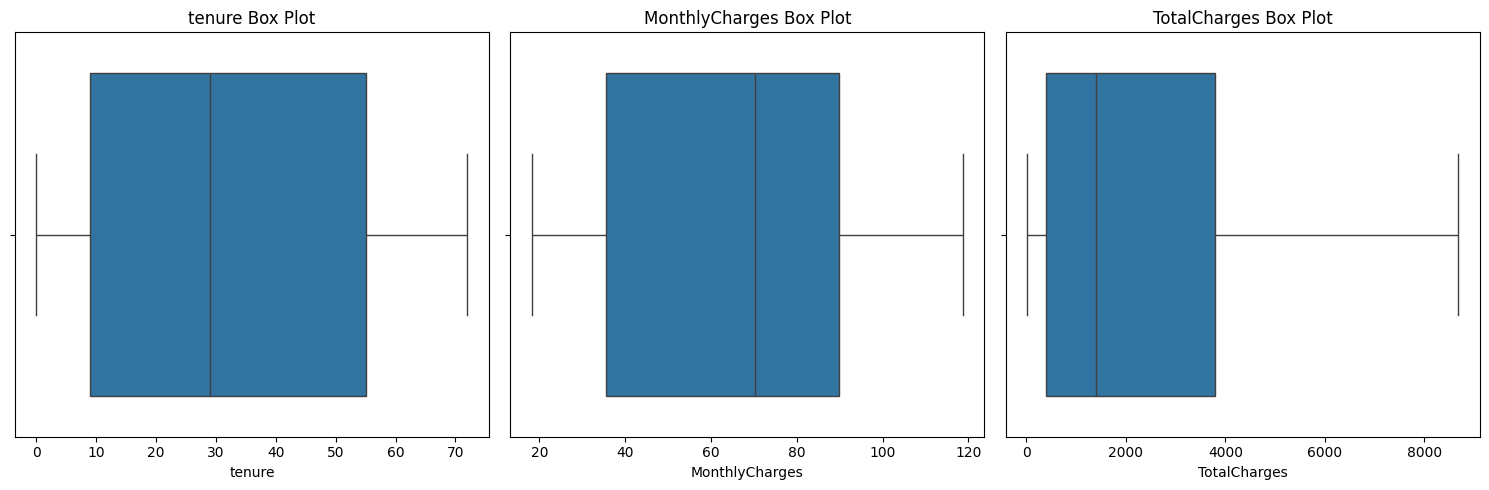

In [133]:
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
plt.figure(figsize=(15, 5))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'{feature} Box Plot')

plt.tight_layout()
plt.show()

## Outliers Analysis with IQR Method

In [134]:
x = ['tenure','MonthlyCharges','TotalCharges']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

No outliers in tenure
No outliers in MonthlyCharges
No outliers in TotalCharges


## Exploratory Data Analysis

#### Numerical features distribution

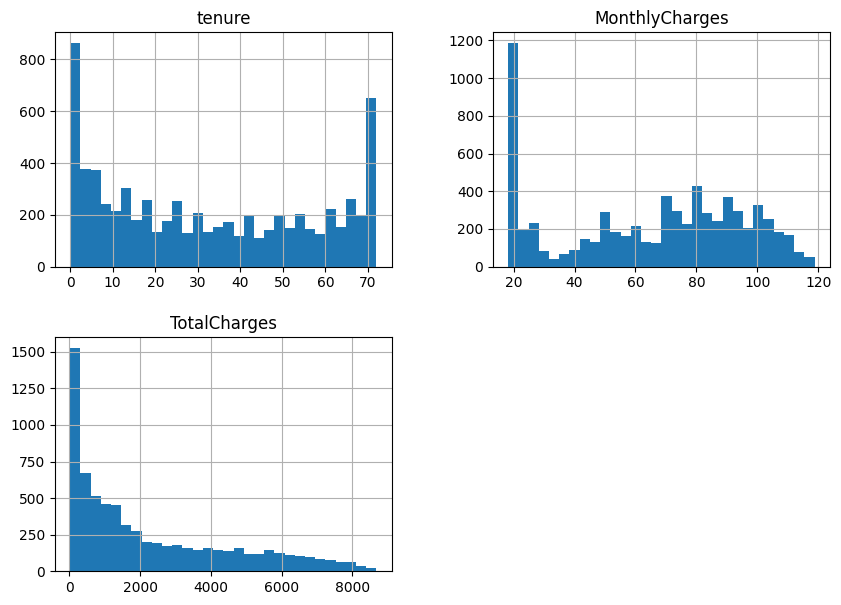

In [135]:
df[numerical_features].hist(bins=30, figsize=(10, 7))
plt.show()

### ✅ Observations:
- Tenure: Right-skewed → More new customers.
- Monthly Charges: Possibly bimodal.
- Total Charges: Correlated with tenure

In [136]:
df.skew(numeric_only= True)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

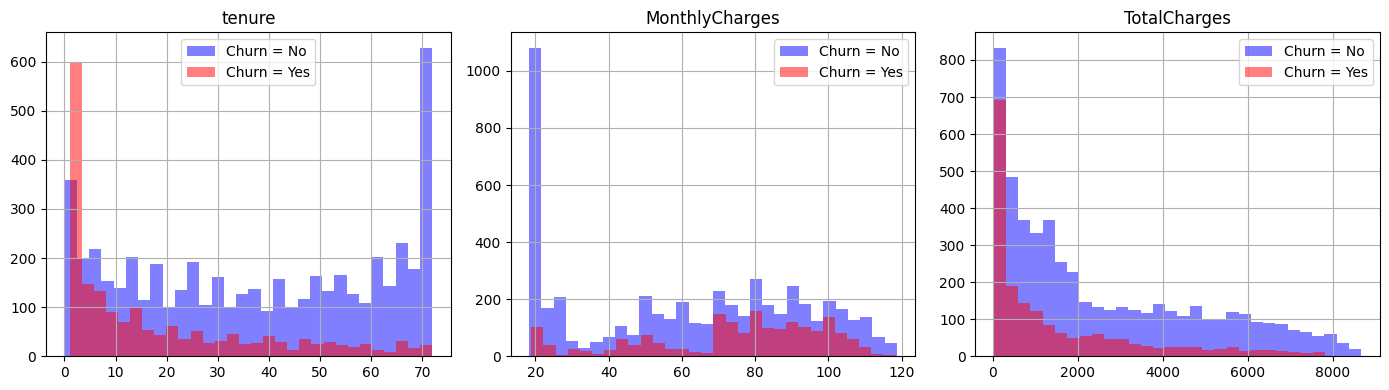

In [137]:
fig, ax = plt.subplots(1, len(numerical_features), figsize=(14, 4))
for i, col in enumerate(numerical_features):
    df[df.Churn == "No"][col].hist(bins=30, color="blue", alpha=0.5, ax=ax[i], label="Churn = No")
    df[df.Churn == "Yes"][col].hist(bins=30, color="red", alpha=0.5, ax=ax[i], label="Churn = Yes")
    ax[i].set_title(col)
    ax[i].legend() 
plt.tight_layout()
plt.show()

- We look at distributions of numerical features in relation to the target variable. We can observe that the greater TotalCharges and tenure are the less is the probability of churn.

In [138]:
df.corr(numeric_only= True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


#### Categorical feature distribution

To analyze categorical features, we use bar charts. We observe that Senior citizens and customers without phone service are less represented in the data.

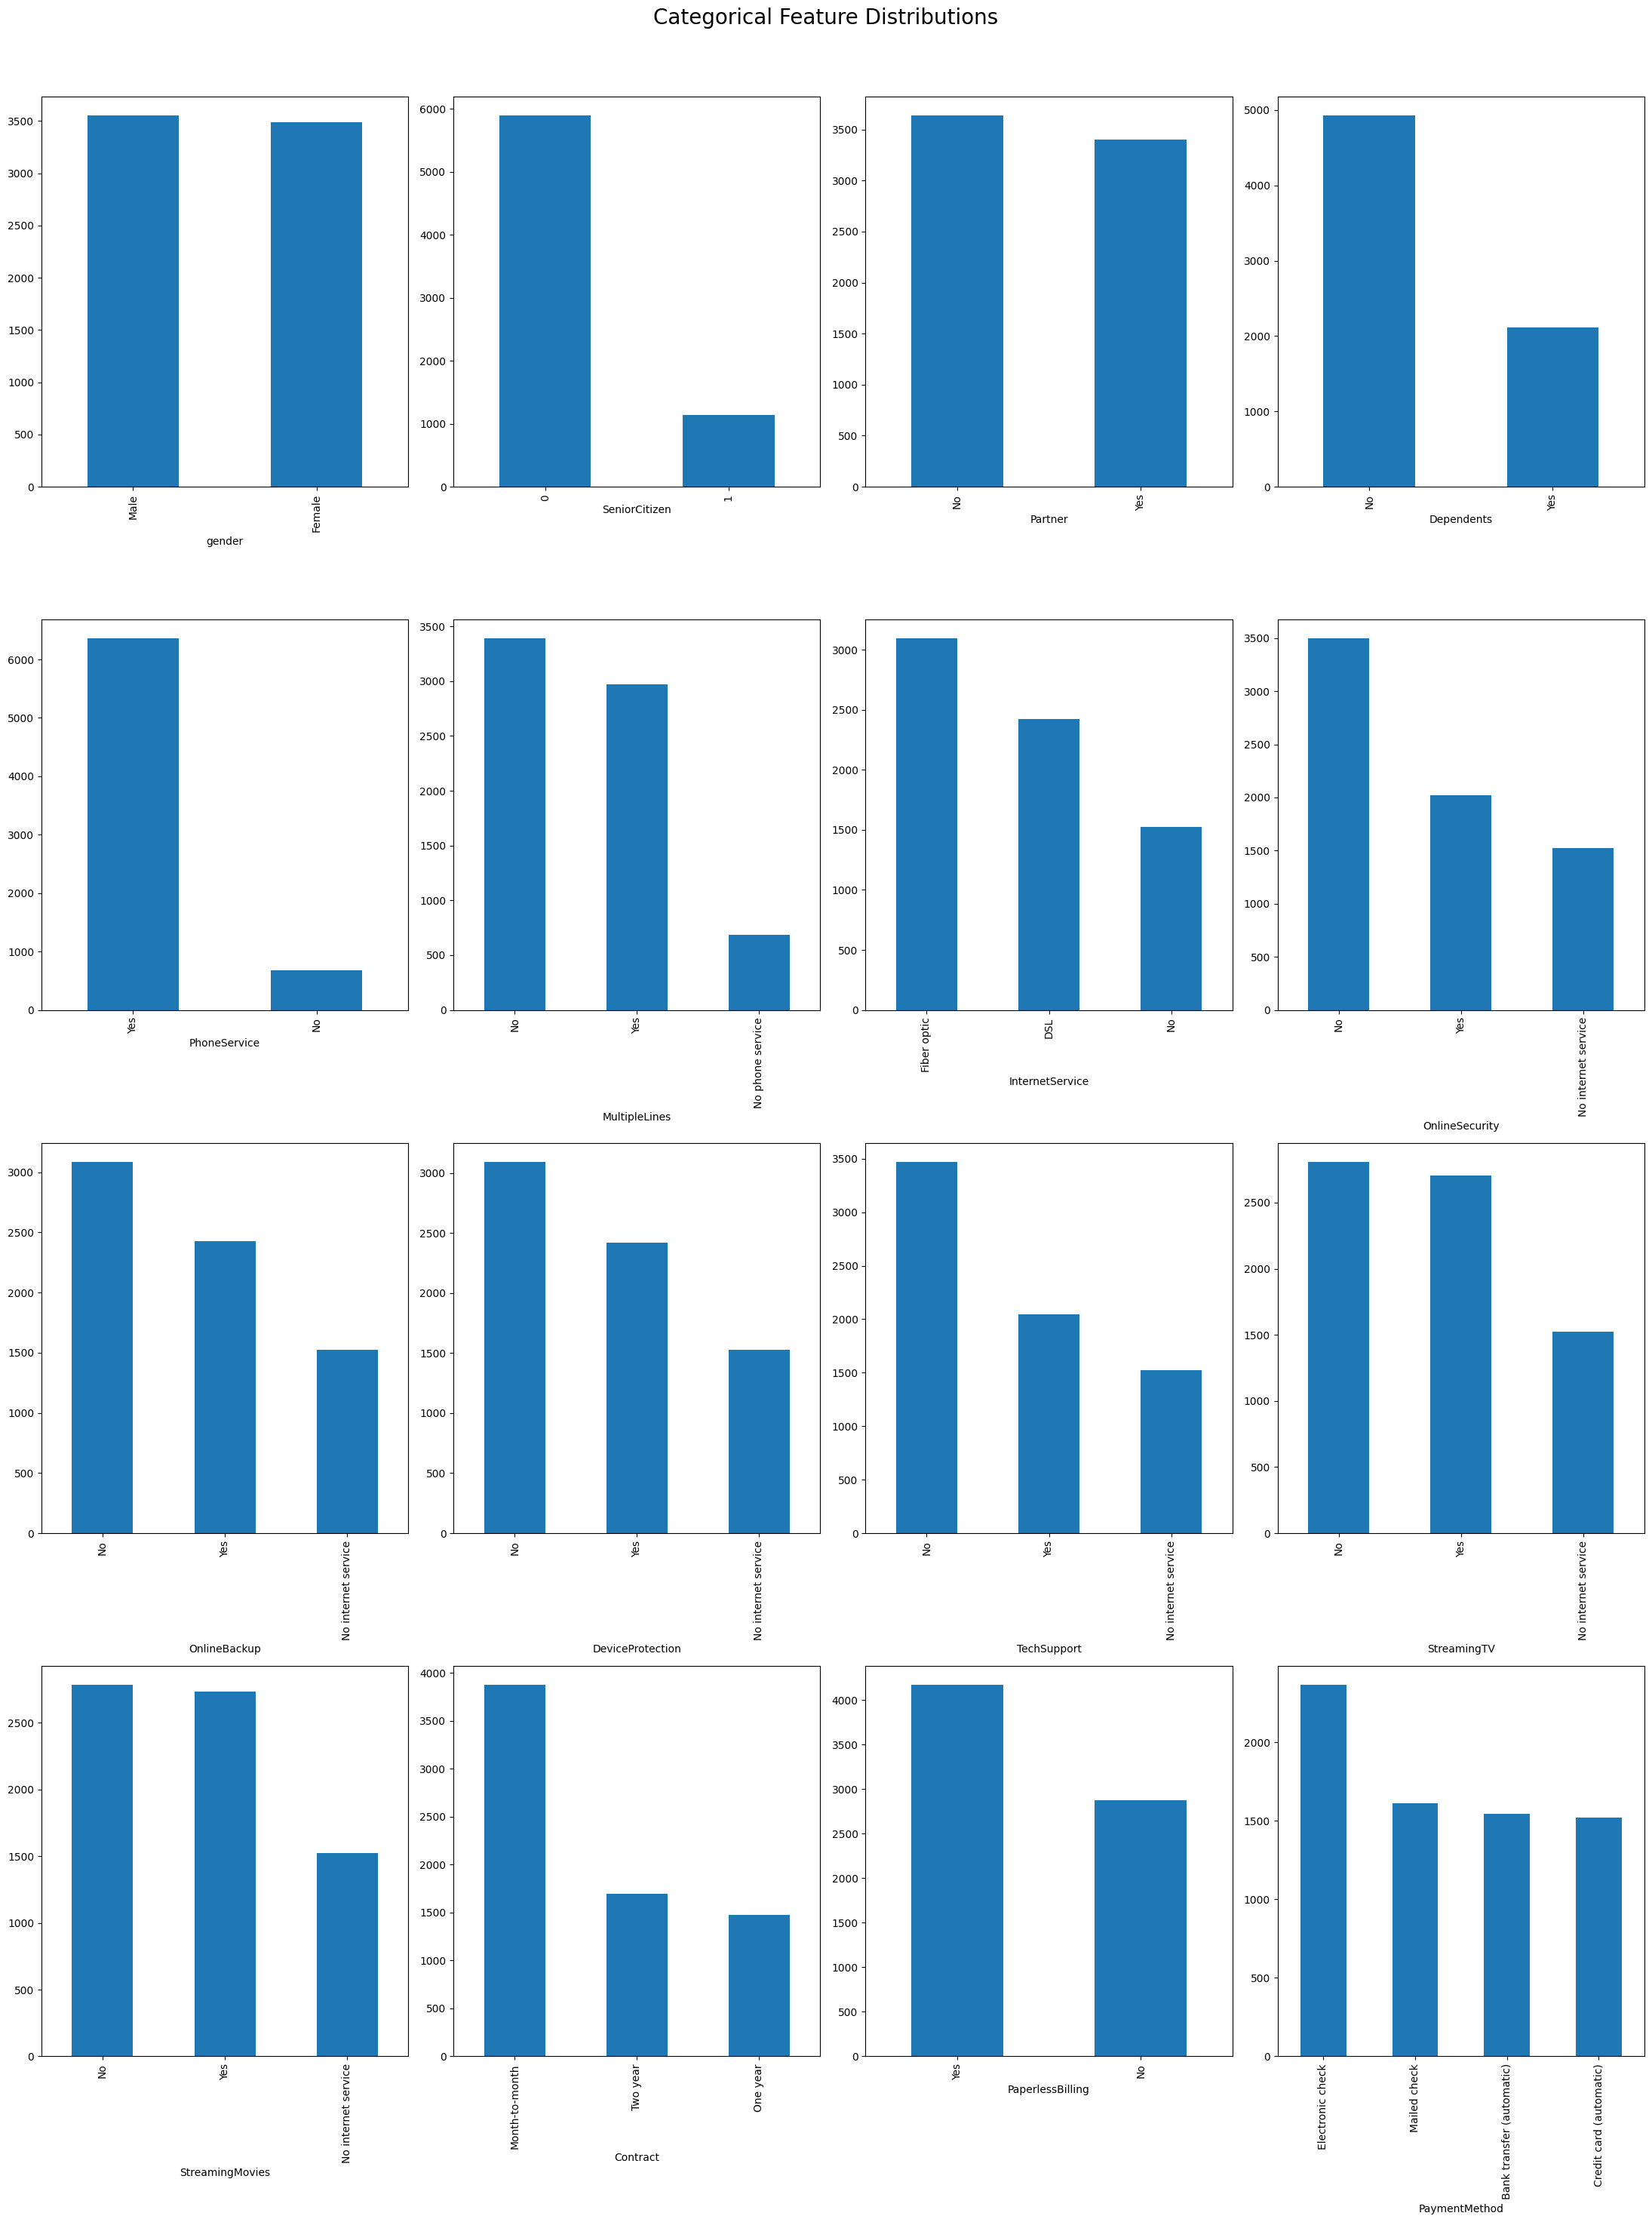

In [139]:
fig, ax = plt.subplots(4, 4, figsize=(22, 30)) 
for i, feature in enumerate(categorical_features):
    df[feature].value_counts().plot(kind='bar', ax=ax.flatten()[i])

fig.suptitle("Categorical Feature Distributions", fontsize=20) 
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

The next step is to examine the relationship between categorical features and the target variable. First, let's look at the contract type. Users with a month-to-month contract are more likely to churn compared to users with long-term contracts

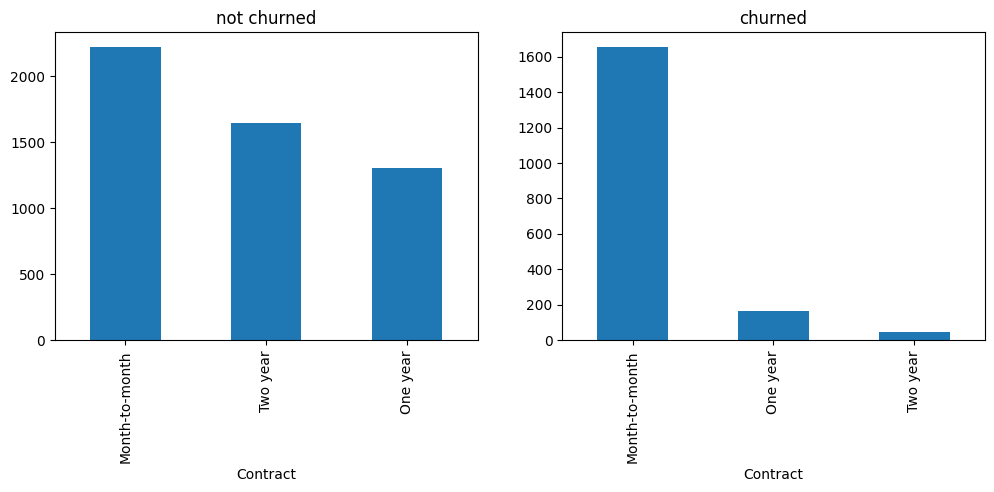

In [140]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df[df.Churn == "No"][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
df[df.Churn == "Yes"][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')
plt.show()

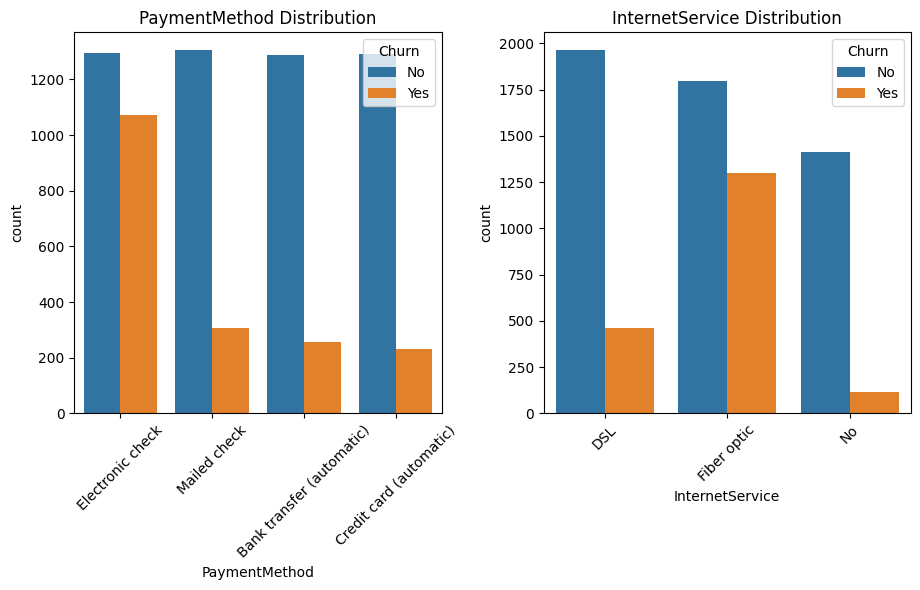

In [141]:
features = ['PaymentMethod', 'InternetService']
plt.figure(figsize=(14, 6))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=feature, data=df,hue='Churn')
    plt.xticks(rotation=45)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

### Payment Method 💳

- **Electronic Check**: Customers using electronic checks have the **highest churn rate.** This could suggest issues with the convenience or satisfaction of this payment method. Investigate potential issues and consider promoting other, more stable payment methods.
### Internet Service 🌐

- **Fiber Optic Internet Service**: Customers using fiber optic services have a **higher churn rate** compared to those using DSL or those without internet service. This might reflect pricing issues, service quality concerns, or competitive pressures in fiber optic areas. Investigate and address these issues to improve customer retention.

### Target variable distribution

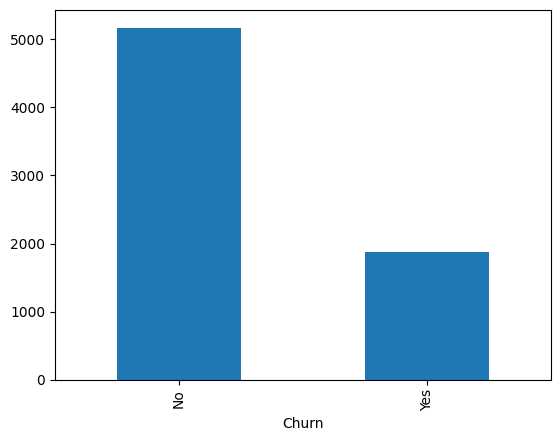

In [142]:
df[target].value_counts().plot(kind='bar')
plt.show()

The target variable distribution indicates that we are dealing with an imbalanced dataset, with a significantly higher number of non-churned users compared to churned users. Consequently, relying solely on accuracy as a performance metric can be misleading. Although the model might achieve high accuracy by predominantly predicting the majority class (non-churned users), this does not provide a comprehensive evaluation of the model's performance in predicting churned users.

- It is essential to consider additional evaluation metrics, such as precision, recall, and F1-score, to gain a more complete understanding of the model's effectiveness in handling the imbalanced dataset.

## Cleaning and Transforming Data

In [143]:
df.drop(['customerID'],axis = 1,inplace = True)

In [144]:
df.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5315,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,45.6,45.6,Yes


#### Dropped customerID because it is not needed

### One-Hot Encoding

In [145]:
df1=pd.get_dummies(data=df,columns=['gender', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], drop_first=True)

In [146]:
df1.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True


In [147]:
df1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

### Rearranging Columns

In [148]:
df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn_Yes']]

In [149]:
df1.sample()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
3447,0,39,81.4,3213.75,True,False,False,True,False,True,...,False,False,False,True,False,False,True,False,False,False


In [150]:
df1.shape

(7043, 31)

In [151]:
# The imputer will replace missing values with the mean of the non-missing values for the respective columns
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

### Feature Scaling

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [153]:
scaler.fit(df1.drop(['Churn_Yes'],axis = 1))
scaled_features = scaler.transform(df1.drop('Churn_Yes',axis = 1))

### Feature Selection

In [154]:
X = scaled_features
Y = df1['Churn_Yes']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

# Model training

#### Logistic Regression

In [155]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [156]:
predLR = logmodel.predict(X_test)

In [157]:
predLR

array([False, False, False, ..., False, False, False])

In [158]:
Y_test

5616    False
2937    False
1355    False
5441     True
3333    False
        ...  
2797     True
412     False
174     False
5761    False
5895    False
Name: Churn_Yes, Length: 2113, dtype: bool

#### print(classification_report(Y_test, predLR))

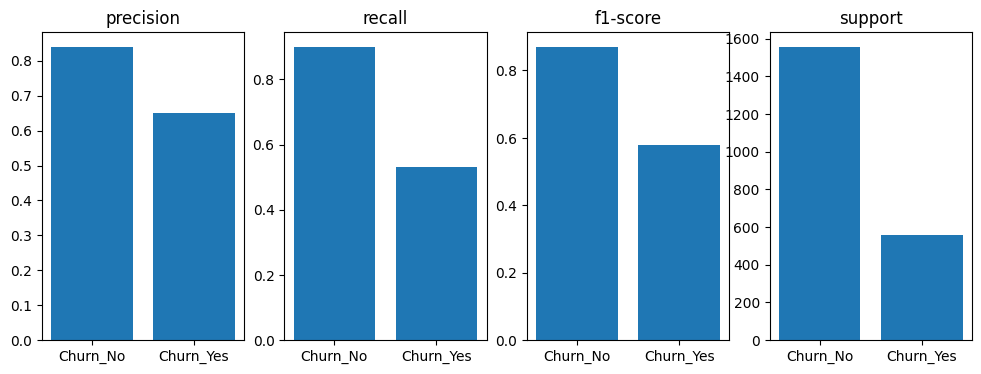

In [159]:
# calculate the classification report
report = classification_report(Y_test, predLR, target_names=['Churn_No', 'Churn_Yes'])

# split the report into lines
lines = report.split('\n')

# split each line into parts
parts = [line.split() for line in lines[2:-5]]

# extract the metrics for each class
class_metrics = dict()
for part in parts:
    class_metrics[part[0]] = {'precision': float(part[1]), 'recall': float(part[2]), 'f1-score': float(part[3]), 'support': int(part[4])}

# create a bar chart for each metric
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
metrics = ['precision', 'recall', 'f1-score', 'support']
for i, metric in enumerate(metrics):
    ax[i].bar(class_metrics.keys(), [class_metrics[key][metric] for key in class_metrics.keys()])
    ax[i].set_title(metric)

# display the plot
plt.show()

## Handling Imbalanced Data with SMOTE
As mentioned earlier, the dataset is imbalanced, with a significantly higher number of non-churned users compared to churned users. To address this, we apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset before training the model.

#### Why use SMOTE?
SMOTE is used to generate synthetic samples for the minority class (churned users) rather than simply duplicating existing ones. This helps the model learn patterns from both classes more effectively, reducing bias toward the majority class and improving predictive performance on churned customers.



#### Apply SMOTE to Balance the Dataset

In [160]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

# Check new class distribution
print("New class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

New class distribution after SMOTE:
Churn_Yes
False    3617
True     3617
Name: count, dtype: int64


In [161]:
xr_train,xr_test,yr_train,yr_test = train_test_split(X_resampled,y_resampled,test_size=0.2)

### LogisticRegression 

In [162]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=100)

log_model = LogisticRegression(random_state=100)  
log_model.fit(xr_train, yr_train)

y_pred_smote = log_model.predict(xr_test)
print("Classification Report:\n", classification_report(yr_test, y_pred_smote, labels=[0, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76       716
           1       0.76      0.83      0.79       731

    accuracy                           0.78      1447
   macro avg       0.78      0.78      0.78      1447
weighted avg       0.78      0.78      0.78      1447



#### Checking Overfitting

In [163]:
train_accuracy = log_model.score(xr_train, yr_train)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
test_accuracy = log_model.score(xr_test, yr_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

if train_accuracy > test_accuracy:
    print("Warning: The model might be overfitting.")
else:
    print("No signs of overfitting.")

Training Accuracy: 77.62%
Test Accuracy: 77.75%
No signs of overfitting.


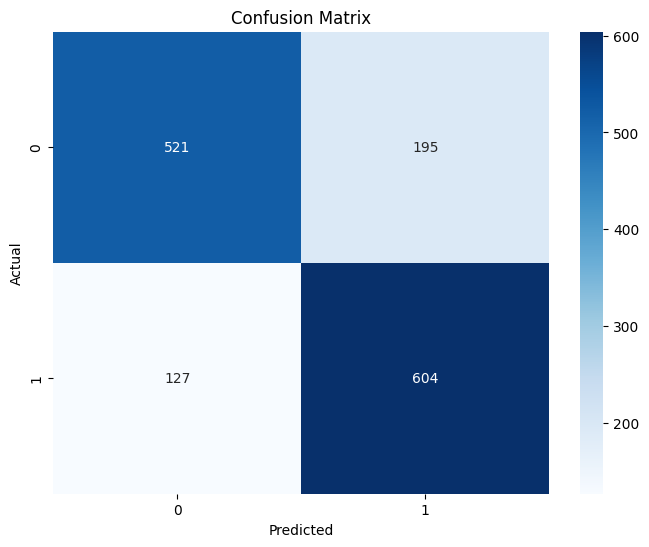

In [164]:
conf_matrix = confusion_matrix(yr_test, y_pred_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### DecisionTreeClassifier 

In [165]:
model_dt_smote=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

In [166]:
model_dt_smote.fit(xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [167]:
y_pred_smote = model_dt_smote.predict(xr_test)

In [168]:
print(classification_report(yr_test,y_pred_smote,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       716
           1       0.78      0.77      0.78       731

    accuracy                           0.78      1447
   macro avg       0.78      0.78      0.78      1447
weighted avg       0.78      0.78      0.78      1447



### RandomForestClassifier

In [169]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=100)

model_rf_smote = RandomForestClassifier(random_state=100, n_estimators=100, max_depth=10, max_features="sqrt", bootstrap=True)

model_rf_smote.fit(xr_train, yr_train)

y_pred_smote = model_rf_smote.predict(xr_test)

print(classification_report(yr_test, y_pred_smote, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       716
           1       0.83      0.88      0.85       731

    accuracy                           0.85      1447
   macro avg       0.85      0.85      0.85      1447
weighted avg       0.85      0.85      0.85      1447



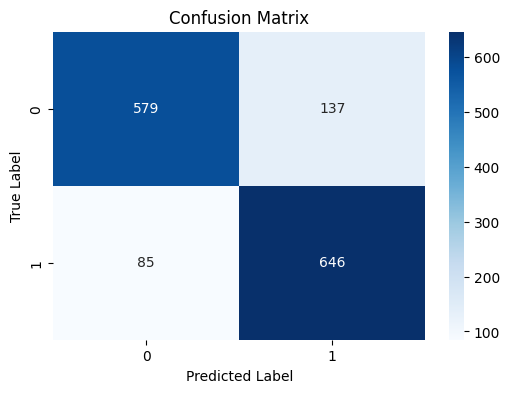

In [170]:
conf_matrix = confusion_matrix(yr_test, y_pred_smote)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

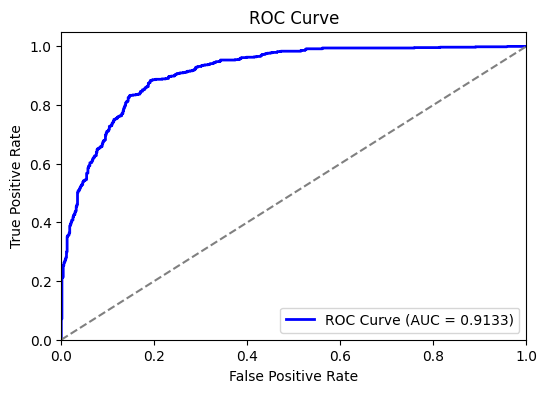

In [171]:
# Get the probabilities for the positive class (1)
y_probs = model_rf_smote.predict_proba(xr_test)[:, 1]
# Compute the ROC curve
fpr, tpr, _ = roc_curve(yr_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [172]:
# IF to check test_and_train accuracy
# train_accuracy = model_rf_smote.score(xr_train, yr_train)
# test_accuracy = model_rf_smote.score(xr_test, yr_test)

# print(f"Training Accuracy: {train_accuracy:.4f}")
# print(f"Test Accuracy: {test_accuracy:.4f}")

### Xg Boost

In [173]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=100)

model_xgb_smote = xgb.XGBClassifier(
    random_state=100, 
    n_estimators=100, 
    max_depth=3, 
    learning_rate=0.1, 
    eval_metric='logloss'  
)

model_xgb_smote.fit(xr_train, yr_train)

y_pred_smote = model_xgb_smote.predict(xr_test)

print(classification_report(yr_test, y_pred_smote, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       716
           1       0.83      0.89      0.86       731

    accuracy                           0.85      1447
   macro avg       0.85      0.85      0.85      1447
weighted avg       0.85      0.85      0.85      1447



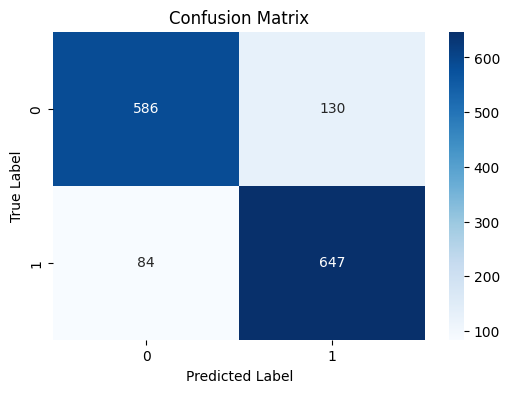

In [174]:
cm = confusion_matrix(yr_test, y_pred_smote)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

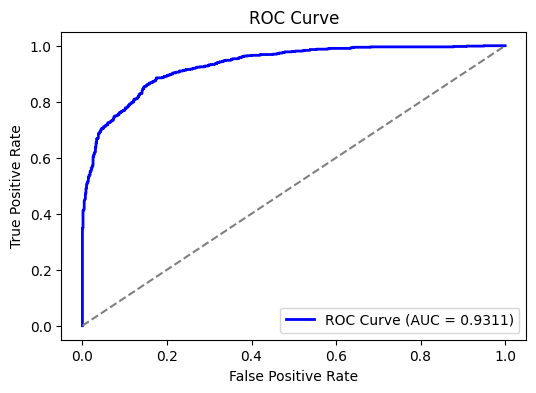

In [175]:
y_probs_smote = model_xgb_smote.predict_proba(xr_test)[:, 1]

fpr, tpr, _ = roc_curve(yr_test, y_probs_smote)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### SVC

In [176]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=100)

model_svm_smote = SVC(random_state=100, kernel='rbf', C=1.0, gamma='scale')

model_svm_smote.fit(xr_train, yr_train)

y_pred_smote = model_svm_smote.predict(xr_test)

print(classification_report(yr_test, y_pred_smote, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       716
           1       0.78      0.87      0.82       731

    accuracy                           0.81      1447
   macro avg       0.81      0.81      0.81      1447
weighted avg       0.81      0.81      0.81      1447



### KNN

In [177]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=100)

model_knn_smote = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

model_knn_smote.fit(xr_train, yr_train)

y_pred_smote = model_knn_smote.predict(xr_test)

print(classification_report(yr_test, y_pred_smote, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75       716
           1       0.73      0.89      0.80       731

    accuracy                           0.78      1447
   macro avg       0.80      0.78      0.78      1447
weighted avg       0.79      0.78      0.78      1447



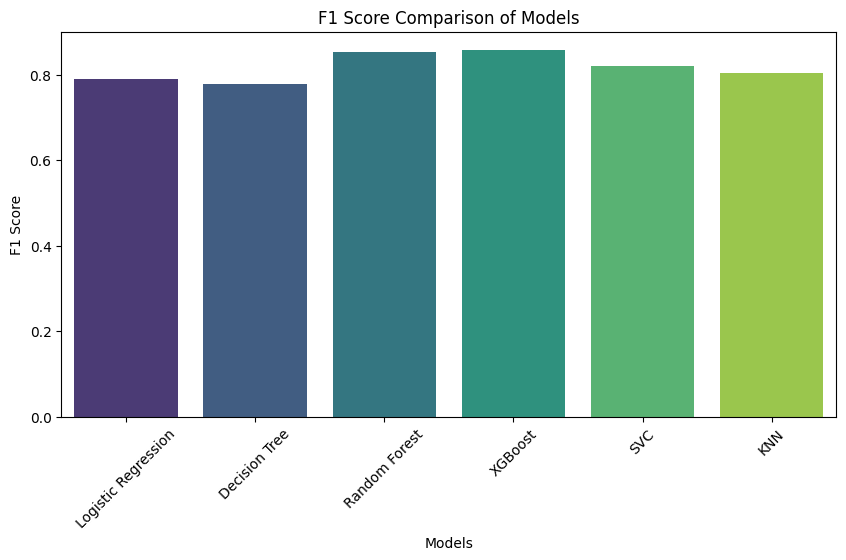

In [178]:
models = {
    "Logistic Regression": log_model,
    "Decision Tree": model_dt_smote,
    "Random Forest": model_rf_smote,
    "XGBoost": model_xgb_smote,
    "SVC": model_svm_smote,
    "KNN": model_knn_smote
}
f1_scores = {name: f1_score(yr_test, model.predict(xr_test)) for name, model in models.items()}
f1_df = pd.DataFrame(list(f1_scores.items()), columns=["Model", "F1 Score"])

plt.figure(figsize=(10, 5))
sns.barplot(data=f1_df, x="Model", y="F1 Score", hue="Model", legend=False, palette="viridis")
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison of Models")
plt.xticks(rotation=45)
plt.show()

- Based on my evaluation, Random Forest and XGBoost have shown the highest F1 scores among the models I've tested.

## HyperTuning for RandomForestClassifier

In [179]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=100)

model_rf_smote = RandomForestClassifier(random_state=100)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model_rf_smote, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(xr_train, yr_train)

print("Best Parameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred_smote = best_rf_model.predict(xr_test)

print(classification_report(yr_test, y_pred_smote, labels=[0, 1]))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       716
           1       0.85      0.88      0.87       731

    accuracy                           0.86      1447
   macro avg       0.86      0.86      0.86      1447
weighted avg       0.86      0.86      0.86      1447



In [180]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=100)

model_rf_smote = RandomForestClassifier(random_state=100)

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}
random_search = RandomizedSearchCV(estimator=model_rf_smote, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=100)
random_search.fit(xr_train, yr_train)

print("Best Parameters:", random_search.best_params_)

best_rf_model = random_search.best_estimator_
y_pred_smote = best_rf_model.predict(xr_test)

print(classification_report(yr_test, y_pred_smote, labels=[0, 1]))

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 187}
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       716
           1       0.85      0.88      0.87       731

    accuracy                           0.86      1447
   macro avg       0.86      0.86      0.86      1447
weighted avg       0.86      0.86      0.86      1447



## **Hyperparameter Tuning for XGBoost: Optimizing Performance with GridSearchCV & RandomizedSearchCV** 

In [181]:
# GridSearchCV
model_xgb = xgb.XGBClassifier(random_state=100, eval_metric='logloss')
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [3, 5, 7],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'subsample': [0.8, 1],  
    'colsample_bytree': [0.8, 1],  
    'gamma': [0, 0.1, 0.2]  
}

grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(xr_train, yr_train)
print("Best Parameters:", grid_search.best_params_)

best_xgb_model = grid_search.best_estimator_
y_pred_smote = best_xgb_model.predict(xr_test)
print(classification_report(yr_test, y_pred_smote))

Best Parameters: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

       False       0.87      0.85      0.86       716
        True       0.85      0.87      0.86       731

    accuracy                           0.86      1447
   macro avg       0.86      0.86      0.86      1447
weighted avg       0.86      0.86      0.86      1447



In [182]:
#RandomizedSearchCV
model_xgb = xgb.XGBClassifier(random_state=100, eval_metric='logloss')
param_dist = {
    'n_estimators': [50, 100, 200, 300],  
    'max_depth': [3, 5, 7, 10],  
    'learning_rate': uniform(0.01, 0.2),  
    'subsample': [0.7, 0.8, 0.9, 1],  
    'colsample_bytree': [0.7, 0.8, 0.9, 1],  
    'gamma': uniform(0, 0.3)  
}
random_search = RandomizedSearchCV(estimator=model_xgb, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=100)
random_search.fit(xr_train, yr_train)

print("Best Parameters:", random_search.best_params_)

best_xgb_model = random_search.best_estimator_
y_pred_smote = best_xgb_model.predict(xr_test)
print(classification_report(yr_test, y_pred_smote))

Best Parameters: {'colsample_bytree': 1, 'gamma': 0.21967813175452935, 'learning_rate': 0.06239711030102208, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
              precision    recall  f1-score   support

       False       0.87      0.86      0.86       716
        True       0.86      0.87      0.87       731

    accuracy                           0.87      1447
   macro avg       0.87      0.87      0.87      1447
weighted avg       0.87      0.87      0.87      1447



Finished.